# ⏬ **Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf


# 🧹 **Data Preprocessing**
- Keras data loading documentation: https://keras.io/api/data_loading/image/

### 🧹 **Training Image Preprocessing**

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "./data/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3115 files belonging to 36 classes.


### 🧹 **Validation Image Preprocessing**

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "./data/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


# 🤖 **Model Building**
- CNN Cheatsheet: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
- Optimal tuning: https://www.kaggle.com/code/codingloading/youtube-video-vanilla-cnn-94-42/notebook

In [ ]:
# Define the model
# Creates a Sequential model, meaning layers will be added one after another.
cnn = tf.keras.models.Sequential()  

# Input layer with input shape
# Defines the input shape (224x224 pixels with 3 color channels: RGB).
cnn.add(tf.keras.layers.Input(shape=(224, 224, 3)))  

# Convolutional Block 1
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same')) # 32 filters, each with a 3x3 kernel, scans the input image. "same" padding ensures output size remains the same.
cnn.add(tf.keras.layers.BatchNormalization())  # Normalizes activations for stable training.
cnn.add(tf.keras.layers.Activation('relu'))  # Applies ReLU activation (ReLU(x) = max(0, x)) to introduce non-linearity.
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) # Reduces spatial dimensions (height & width) by 2x, keeping only important features.

# Convolutional Block 2
cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same'))  # Increases filters to 64 for deeper feature extraction.
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  # Further reduces image size.

# Convolutional Block 3
cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same'))  # Extracts more complex features.
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))  # Further downsamples the image.

# Convolutional Block 4
cnn.add(tf.keras.layers.Conv2D(96, kernel_size=(3, 3), padding='same'))  # Uses 96 filters to detect detailed patterns.
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 5
cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same'))  # Returns to 32 filters for final feature extraction.
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Activation('relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
# Converts the 2D feature maps into a 1D vector, preparing for dense layers.
cnn.add(tf.keras.layers.Flatten())  

# Dense Layers
# Fully connected layer with 256 neurons, helping the model learn complex patterns.
cnn.add(tf.keras.layers.Dense(256, activation='relu'))  

# Dropout randomly disables 30% of neurons during training to prevent overfitting.
cnn.add(tf.keras.layers.Dropout(0.3))  

# Output Layer
# Final output layer with 36 neurons (one per class). Softmax converts outputs into probabilities.
cnn.add(tf.keras.layers.Dense(36, activation='softmax'))  

# Compile the Model
cnn.compile(
    optimizer='adam',  # Adam optimizer adjusts learning rate automatically.
    loss='categorical_crossentropy',  # Loss function for multi-class classification with one-hot encoded labels.
    metrics=['accuracy']  # Tracks accuracy as a metric during training.
)

# Model Summary
cnn.summary()  # Displays model architecture.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 96)     │       110,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 643,940 (2.46 MB)

 Trainable params: 643,236 (2.45 MB)

 Non-trainable params: 704 (2.75 KB)

In [5]:
# # Building convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# # Build pooling layer
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [6]:
# # Building convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# # Build pooling layer
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [7]:
# cnn.add(tf.keras.layers.Flatten())

In [8]:
# cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
# cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))


In [9]:
# cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid overfitting

In [10]:
# Output layer
# cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

# 🔨 **Compiling and Training Phase**

In [11]:
# cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# cnn.summary()

In [13]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 521ms/step - accuracy: 0.0852 - loss: 3.6735 - val_accuracy: 0.1738 - val_loss: 2.9121
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 514ms/step - accuracy: 0.2242 - loss: 2.6899 - val_accuracy: 0.2906 - val_loss: 2.2226
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.3093 - loss: 2.3372 - val_accuracy: 0.3248 - val_loss: 2.4522
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 605ms/step - accuracy: 0.3555 - loss: 2.1308 - val_accuracy: 0.5157 - val_loss: 1.5452
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 580ms/step - accuracy: 0.4048 - loss: 1.9590 - val_accuracy: 0.5613 - val_loss: 1.3213
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 536ms/step - accuracy: 0.4419 - loss: 1.8043 - val_accuracy: 0.6553 - val_loss: 1.1574
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 509ms/step - accuracy: 0.5067 - loss: 1.6413 - val_accuracy: 0.7151 - val_loss: 0.9466
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 502ms/step - accuracy: 0.5304 - loss: 1.5318 - val_accura

# 💾 **Save Model and Training History**

In [14]:
cnn.save('trained_model.keras')

In [15]:
training_history

In [16]:
training_history.history # Return dictionary of history

{'accuracy': [0.11781701445579529,
  0.23916533589363098,
  0.32552167773246765,
  0.36211878061294556,
  0.40963080525398254,
  0.4452648460865021,
  0.5049759149551392,
  0.5187801122665405,
  0.5499197244644165,
  0.5983948707580566,
  0.6099518537521362,
  0.6288924813270569,
  0.6869983673095703,
  0.7040128707885742,
  0.7187801003456116,
  0.74093097448349,
  0.7717496156692505,
  0.7858747839927673,
  0.7983948588371277,
  0.8227929472923279,
  0.8343499302864075,
  0.8401284217834473,
  0.8471910357475281,
  0.8818619847297668,
  0.8667736649513245,
  0.8825039863586426,
  0.8805778622627258,
  0.8825039863586426,
  0.9117174744606018,
  0.8991974592208862,
  0.9178169965744019,
  0.9152488112449646],
 'loss': [3.271624803543091,
  2.6180200576782227,
  2.277036190032959,
  2.12066912651062,
  1.931084156036377,
  1.7915958166122437,
  1.6436424255371094,
  1.5412391424179077,
  1.4373445510864258,
  1.3010103702545166,
  1.2239487171173096,
  1.1362297534942627,
  0.995700776

In [17]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
# Recording Training History in JSON format
import json 
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

# 📈 **Model Evaluation**

In [19]:
# Calculating accuracy of model achieved on validation set
print("Validation Set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation Set Accuracy: 92.59259104728699 %


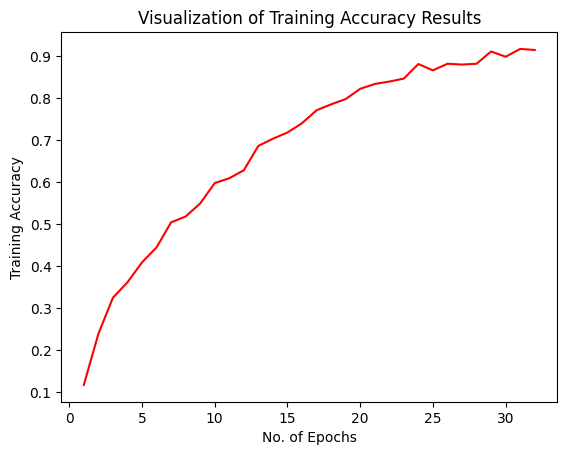

In [20]:
# Accuracy Visualisation
epochs = [i for i in range(1,33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of Training Accuracy Results")
plt.show()


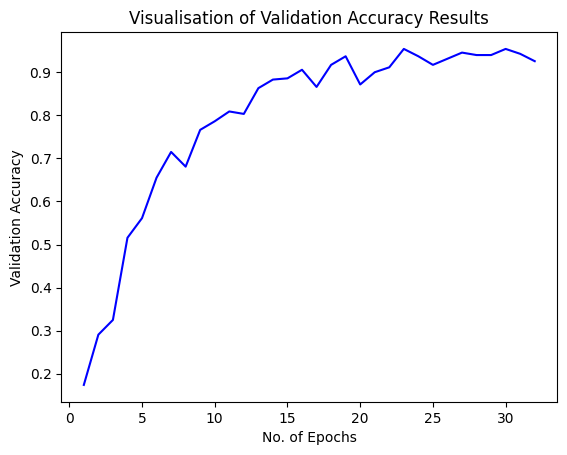

In [21]:
# Accuracy Visualisation
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Visualisation of Validation Accuracy Results")
plt.show()


- https://www.tensorflow.org/guide/keras/training_with_built_in_methods

In [22]:
training_loss, training_accuracy = cnn.evaluate(training_set)


98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9524 - loss: 0.1775


In [23]:
validation_loss, validation_accuracy = cnn.evaluate(validation_set)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9190 - loss: 0.2431


In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "./data/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

test_loss, test_accuracy = cnn.evaluate(test_set)


Found 359 files belonging to 36 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.9217 - loss: 0.2412


----------------------------------------------------------------- END ------------------------------------------------------------------